In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths_science = ['data/science/FORS1.2006-08-03T04_45_33.914.fits',
                 'data/science/FORS1.2006-08-03T04_49_20.636.fits',
                 'data/science/FORS1.2006-08-03T04_52_39.077.fits']
paths_bias    = ['data/bias/FORS1.2006-08-05T10:42:06.611.fits',
                 'data/bias/FORS1.2006-08-05T10:42:53.806.fits',
                 'data/bias/FORS1.2006-08-05T10:43:40.950.fits',
                 'data/bias/FORS1.2006-08-05T10:44:28.196.fits',
                 'data/bias/FORS1.2006-08-05T10:45:15.470.fits']
paths_dark    = ['data/dark/FORS1.2006-07-31T14:39:04.789.fits',
                 'data/dark/FORS1.2006-07-31T13:37:29.975.fits',
                 'data/dark/FORS1.2006-07-31T14:08:17.382.fits']
paths_flat    = ['data/flat (lamp)/FORS1.2006-08-04T11:21:10.142.fits',
                 'data/flat (lamp)/FORS1.2006-08-04T11:22:03.657.fits',
                 'data/flat (lamp)/FORS1.2006-08-04T11:23:04.383.fits',
                 'data/flat (lamp)/FORS1.2006-08-04T11:23:58.680.fits']

In [3]:
# VLT uses 4 detectors here per image, each of which must be separately corrected

In [4]:
# science exposure time needed to correct for dark current during science imaging
sciences = []
sciences_exptimes = []
for path in paths_science:
    fp = fits.open(path)
    array_2x2 = np.array(fp[0].data)
    shape = array_2x2.shape
    mid_x, far_x, mid_y, far_y = int(shape[0]/2-1), int(shape[0]-1), int(shape[1]/2-1), int(shape[0]-1)
    sciences.append([array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1,far_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1,far_y+1))]])
    sciences_exptimes.append(fp[0].header['EXPTIME'])
    fp.close()

In [5]:
biases = []
for path in paths_bias:
    fp = fits.open(path)
    array_2x2 = np.array(fp[0].data)
    shape = array_2x2.shape
    mid_x, far_x, mid_y, far_y = int(shape[0]/2-1), int(shape[0]-1), int(shape[1]/2-1), int(shape[0]-1)
    biases.append([array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1,far_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1))],
                     array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1,far_y+1))]])
    fp.close()

In [6]:
# dark exposure time needed to evaluate dark current
darks = []
darks_exptimes = []
for path in paths_dark:
    fp = fits.open(path)
    array_2x2 = np.array(fp[0].data)
    shape = array_2x2.shape
    mid_x, far_x, mid_y, far_y = int(shape[0]/2-1), int(shape[0]-1), int(shape[1]/2-1), int(shape[0]-1)
    darks.append([array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1,far_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1,far_y+1))]])
    darks_exptimes.append(fp[0].header['EXPTIME'])
    fp.close()

In [7]:
# flat exposure time needed to correct for dark current during flat imaging
flats = []
flats_exptimes = []
for path in paths_flat:
    fp = fits.open(path)
    array_2x2 = np.array(fp[0].data)
    shape = array_2x2.shape
    mid_x, far_x, mid_y, far_y = int(shape[0]/2-1), int(shape[0]-1), int(shape[1]/2-1), int(shape[0]-1)
    flats.append([array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1,far_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1,far_x+1),np.arange(mid_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1))],
                  array_2x2[np.ix_(np.arange(mid_x+1),np.arange(mid_y+1,far_y+1))]])
    flats_exptimes.append(fp[0].header['EXPTIME'])
    fp.close()

In [8]:
master_bias = []
bias = np.zeros(4)
readout_noise = np.zeros(4)
for quadrant in biases[0]:
    master_bias.append(np.zeros(quadrant.shape))
for b in range(0, len(biases)): # bias indexes
    for q in range(0, 4):       # quadrant indexes
        master_bias[q] += biases[b][q] / len(biases)
        bias[q] += np.mean(biases[b][q]) / len(biases)
        readout_noise[q] += np.std(biases[b][q]) / len(biases)

print(f'mean bias (#e^-)\t{bias}')
print(f'mean readout noise (#e^-)\t{readout_noise}')

mean bias (#e^-)	[237.12725326 227.34112774 235.52065956 238.1563525 ]
mean readout noise (#e^-)	[6.72273506 6.60581621 5.49169245 5.32645306]


In [9]:
master_dark = []
dark = np.zeros(4)
for quadrant in darks[0]:
    master_dark.append(np.zeros(quadrant.shape))
for d in range(0, len(darks)): # darks index
    for q in range(0, 4):      # quadrant indexes
        master_dark[q] += (darks[d][q]-master_bias[q]) / darks_exptimes[d] / len(darks)
        dark[q] += np.mean(darks[d][q]-master_bias[q]) / darks_exptimes[d] / len(darks)

print(f'dark current (#e^-/hr)\t{dark*3600}')

dark current (#e^-/hr)	[15.92936079 17.87368875 18.80119141 13.97743585]


In [10]:
master_flat = []
for quadrant in flats[0]:
    master_flat.append(np.zeros(quadrant.shape))
for f in range(0, len(flats)): # flats index
    for q in range(0, 4):      # quadrant indexes
        master_flat[q] += flats[f][q]

In [11]:
# true image = (science - master bias - master dark * science exposure time) /
#    normalized(master flat - master bias - master dark * flat exposure time)
image = []
for quadrant in sciences[0]:
    image.append(np.empty(quadrant.shape))
for q in range(0, 4):
    image[q] = ((sciences[0][q]-master_bias[q]-master_dark[q]*sciences_exptimes[0])
             /  (master_flat[q]-master_bias[q]-master_dark[q]*flats_exptimes[0])
             *  np.max(master_flat[q]-master_bias[q]-master_dark[q]*flats_exptimes[0]))

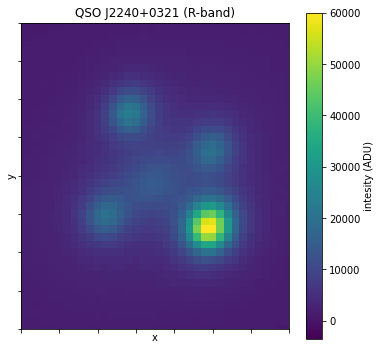

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
plt.imshow(image[1])
plt.xlim(885, 920)
plt.ylim(145, 185)
plt.title('QSO J2240+0321 (R-band)')
plt.xlabel('x')
plt.ylabel('y')
plt.tick_params(axis='both', labelbottom=False, labelleft=False)
cbar = plt.colorbar()
cbar.set_label('intesity (ADU)')
plt.show()